In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading datasets

%store -r df1_new
%store -r df2_new
%store -r df3_new
%store -r df4_new
%store -r df5_new

# Data analysis



I will  firstly examine the year 2015. I intend to look at different regions. I will check which of the six factors contributes the most to the happines score (regions and continets) and discuss results a bit.

In [3]:
df1_new.columns

Index(['country', 'region', 'happiness score', 'GDP_15',
       'family/social_support_15', 'life_expectancy_15',
       'freedom_to_make_choices_15', 'perception_of_corruption_15',
       'generosity_15', 'residual_15'],
      dtype='object')

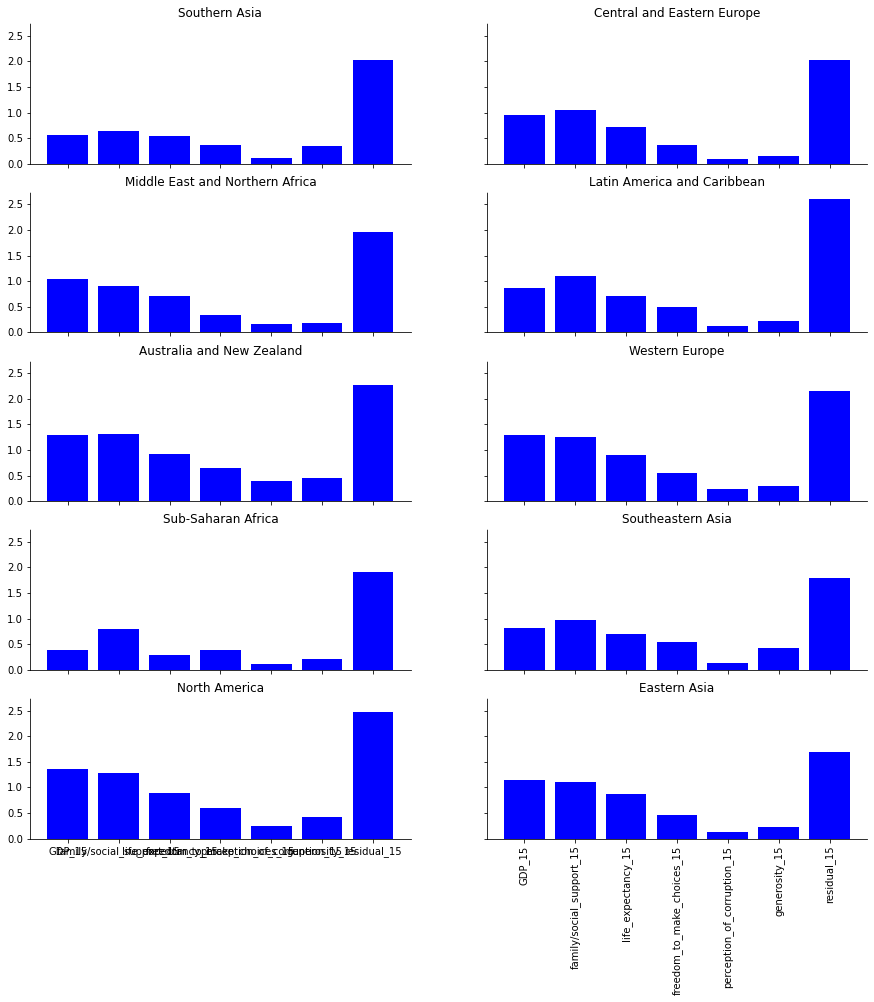

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fig,ax=plt.subplots(5,2, sharex=True,sharey=True,figsize=(15,15))
regions=df1_new['region'].unique();
for i, ax in enumerate(ax.flat):
    ax.bar(x=['GDP_15',
       'family/social_support_15', 'life_expectancy_15',
       'freedom_to_make_choices_15', 'perception_of_corruption_15',
       'generosity_15', 'residual_15'], height=list(df1_new[df1_new['region']==regions[i]][['GDP_15',
       'family/social_support_15', 'life_expectancy_15',
       'freedom_to_make_choices_15', 'perception_of_corruption_15',
       'generosity_15', 'residual_15']].mean()),color='blue')
      
    ax.set_title(regions[i])
    ax.set_xticklabels(['GDP_15',
       'family/social_support_15', 'life_expectancy_15',
       'freedom_to_make_choices_15', 'perception_of_corruption_15',
       'generosity_15', 'residual_15'])
    ax.spines[['right','top']].set_color('white')
    
plt.xticks(rotation='vertical')
plt.show()

From above subplots we can see that the most important factors are GDP per Capita (Western Europe, North America,Middle East and North Africa,East Asia) and Family(Australi and NZ, Latin America and Caribbean,SouthernAsia,Central and Eastern Europe,Southern Asia and Sub-Saharan Africa). That is followed by Life Expectancy

Let's chek their values

In [5]:
factors=['GDP_15',
       'family/social_support_15', 'life_expectancy_15',
       'freedom_to_make_choices_15', 'perception_of_corruption_15',
       'generosity_15', 'residual_15']

In [6]:
for fact in factors:

    print(f'The mean value of {fact} if {round(df1_new[fact].mean(),2)}\n')

The mean value of GDP_15 if 0.87

The mean value of family/social_support_15 if 1.0

The mean value of life_expectancy_15 if 0.66

The mean value of freedom_to_make_choices_15 if 0.43

The mean value of perception_of_corruption_15 if 0.14

The mean value of generosity_15 if 0.24

The mean value of residual_15 if 2.08



Looking at those values I can assume that the happinesss core will ahve tjhe highest correlation with GDP, life expecatncy and family support. 



<AxesSubplot:>

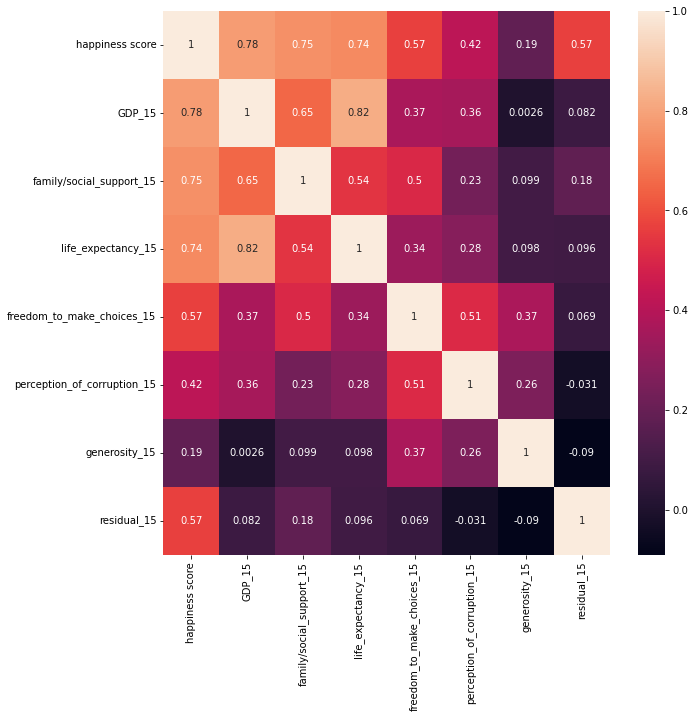

In [7]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data=df1_new[['happiness score','GDP_15',
       'family/social_support_15', 'life_expectancy_15',
       'freedom_to_make_choices_15', 'perception_of_corruption_15',
       'generosity_15', 'residual_15']].corr(),annot=True)

As we could see, the happiness score has the highest correaltion with the GDP. 

But somethng else is interesting: the highest correlation overall is between GDP and life expectancy (positive indicating that rise in one is followed by the rise in the other variable, and vice versa).Pretty high is the correlation between GDP and family support too. 

We could argue that the GDP is driving up the happiness, life expectancy and the family relationships in general. But lets' see how did those scores change over years. I will make a new dataframe with avearge values for factors over years

In [8]:
l15=[]
l16=[]
l17=[]
l18=[]
l19=[]
value_list=[l15,l16,l17,l18,l19]

In [9]:

new_col=['country','region','happiness score','GDP','family/social_support','life_expectancy_','freedom_to_make_choices','perception_of_corruption','generosity','residual']
df1_comp=df1_new.rename(columns=dict(zip(df1_new.columns,new_col)),inplace=True)
df2_comp=df2_new.rename(columns=dict(zip(df2_new.columns,new_col)),inplace=True)
df3_comp=df3_new.rename(columns=dict(zip(df3_new.columns,new_col)),inplace=True)
df4_comp=df4_new.rename(columns=dict(zip(df4_new.columns,new_col)),inplace=True)
df5_comp=df5_new.rename(columns=dict(zip(df5_new.columns,new_col)),inplace=True)

In [10]:
df1_new

,country,region,happiness score,GDP,family/social_support,life_expectancy_,freedom_to_make_choices,perception_of_corruption,generosity,residual
0,Afghanistan,Southern Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,Albania,Central and Eastern Europe,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,Algeria,Middle East and Northern Africa,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,Argentina,Latin America and Caribbean,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
4,Armenia,Central and Eastern Europe,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
...,...,...,...,...,...,...,...,...,...,...
141,Venezuela,Latin America and Caribbean,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
142,Vietnam,Southeastern Asia,5.360,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
143,Yemen,Middle East and Northern Africa,4.077,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313
144,Zambia,Sub-Saharan Africa,5.129,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430


In [11]:
factors_new=['GDP','family/social_support','life_expectancy_','freedom_to_make_choices','perception_of_corruption','generosity','residual']
frames=[df1_new,df2_new,df3_new,df4_new,df5_new]
for i,frame in enumerate(frames):
    for fact in factors_new:
        value_list[i].append(frame[fact].mean())

In [12]:
import numpy as np
df_compare=pd.DataFrame(data=np.array(value_list),columns=[['GDP','family/social_support','life_expectancy_','freedom_to_make_choices','perception_of_corruption','generosity','residual']],index=[2015,2016,2017,2018,2019])

In [13]:
df_compare=df_compare.T.stack().reset_index().rename(columns={'level_0':'factor','level_1':'year',0:'value'})

In [14]:
df_compare.head()

,factor,year,value
0,GDP,2015,0.872246
1,GDP,2016,0.975416
2,GDP,2017,1.014149
3,GDP,2018,0.919856
4,GDP,2019,0.939329


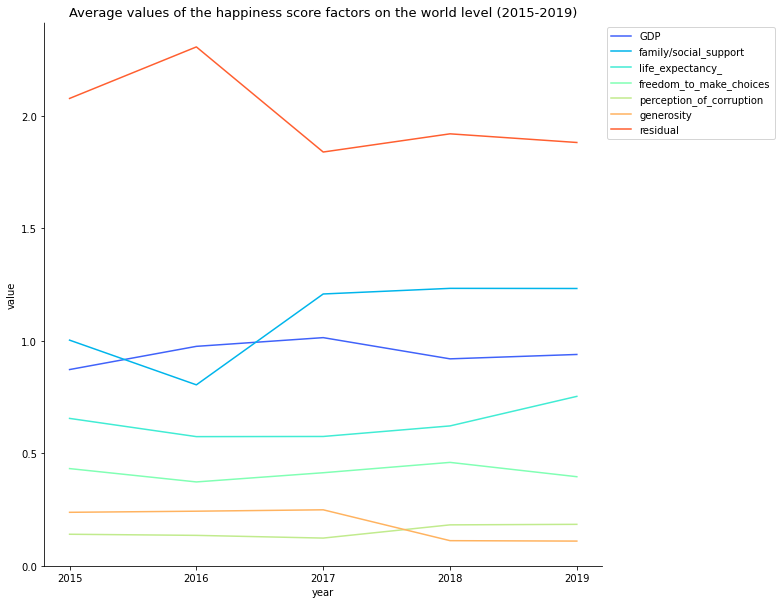

In [15]:
plt.figure(figsize=(10,10))


sns.lineplot(data=df_compare,x='year',y='value',hue='factor',palette='rainbow')

plt.legend(bbox_to_anchor=(1,1))
plt.title('Average values of the happiness score factors on the world level (2015-2019)',size=13)
plt.xticks(ticks=[2015,2016,2017,2018,2019])

ax=plt.gca()
ax.spines[['right','top']].set_color('white')
plt.show()

The extent to which GDP determines the happiness index on the world level is decreasing. On the other hand the effect of Family support is increasing. From the pervious analyzis I know that Australi, NA and Western Europe have the highest score. Sub-Saharan Africa has an increasing score over years and the Latin America ahs decreasing score over years. 

I will choose these continets to cehck the 3 most importan factors : GDP, Family support and Life expectancy.

In [16]:
df1_new.region.unique()

array(['Southern Asia', 'Central and Eastern Europe',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Australia and New Zealand', 'Western Europe',
       'Sub-Saharan Africa', 'Southeastern Asia', 'North America',
       'Eastern Asia'], dtype=object)

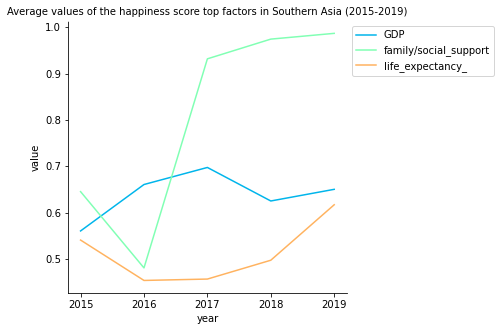

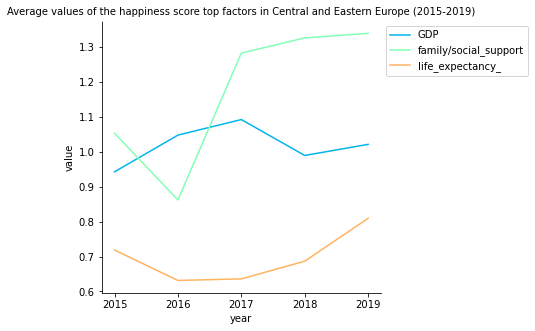

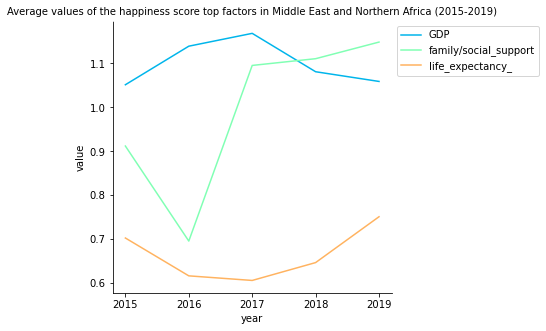

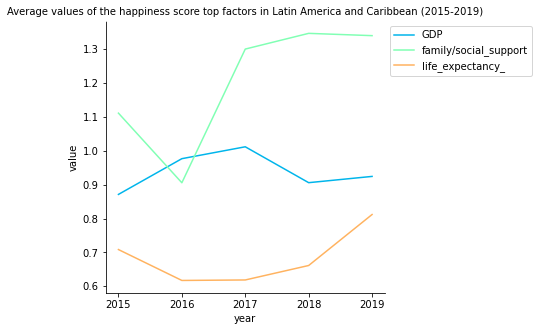

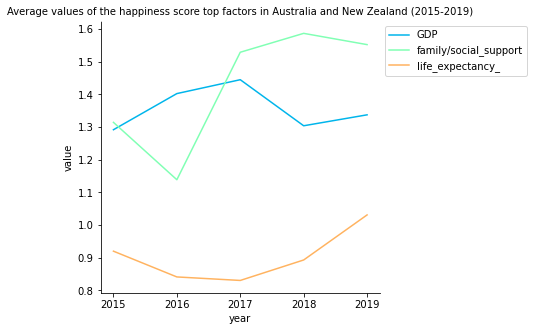

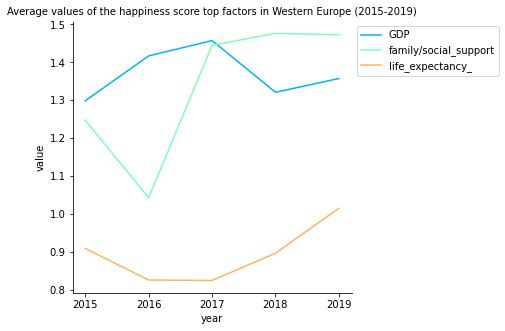

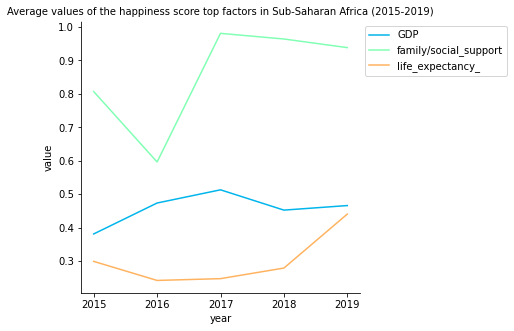

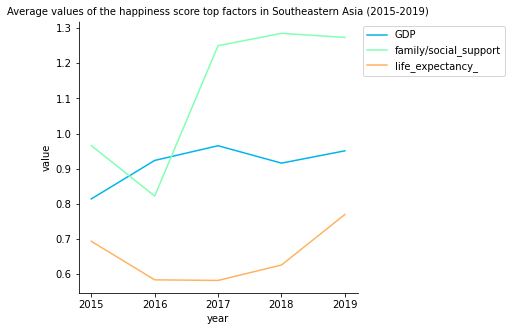

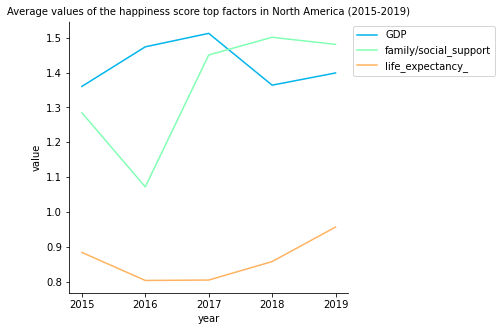

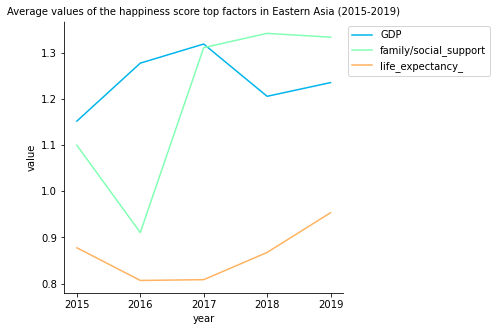

In [17]:
regions=['Southern Asia', 'Central and Eastern Europe','Middle East and Northern Africa',
         'Latin America and Caribbean','Australia and New Zealand', 'Western Europe','Sub-Saharan Africa', 
         'Southeastern Asia', 'North America','Eastern Asia']
for reg in regions:
    l15=[]
    l16=[]
    l17=[]
    l18=[]
    l19=[]
    value_list=[l15,l16,l17,l18,l19]
    top_factors=['GDP','family/social_support','life_expectancy_']
    frames=[df1_new[df1_new['region']==reg],df2_new[df2_new['region']==reg],
           df3_new[df3_new['region']==reg],df4_new[df4_new['region']==reg],
            df5_new[df5_new['region']==reg]]

    for i,frame in enumerate(frames):
        for fact in top_factors:
            value_list[i].append(frame[fact].mean())

    df_compare=pd.DataFrame(data=np.array(value_list),columns=[['GDP','family/social_support','life_expectancy_']],
                            index=[2015,2016,2017,2018,2019])


    df_compare=df_compare.T.stack().reset_index().rename(columns={'level_0':'factor','level_1':'year',0:'value'})

    df_compare

    plt.figure(figsize=(5,5))


    sns.lineplot(data=df_compare,x='year',y='value',hue='factor',palette='rainbow')

    plt.legend(bbox_to_anchor=(1,1))
    plt.title(f'Average values of the happiness score top factors in {reg} (2015-2019)',size=10)
    plt.xticks(ticks=[2015,2016,2017,2018,2019])

    ax=plt.gca()
    ax.spines[['right','top']].set_color('white')
    plt.show()

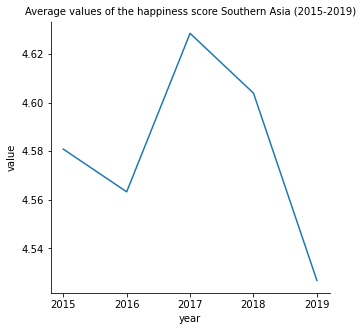

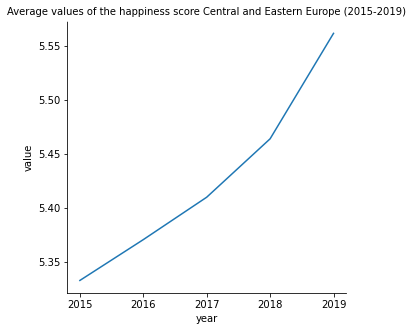

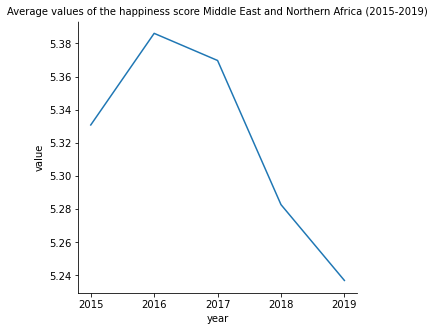

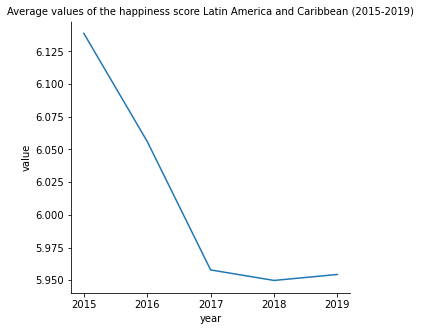

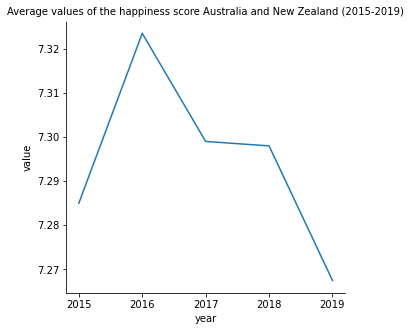

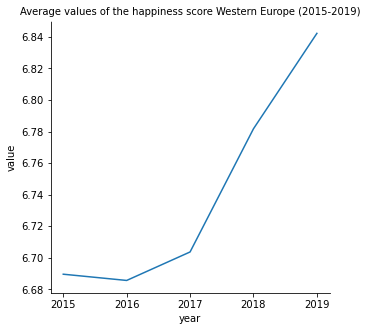

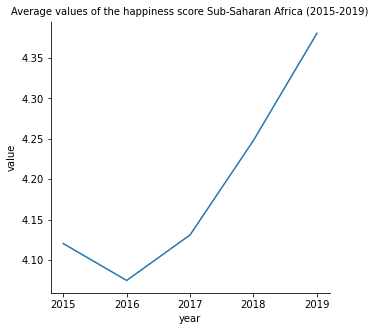

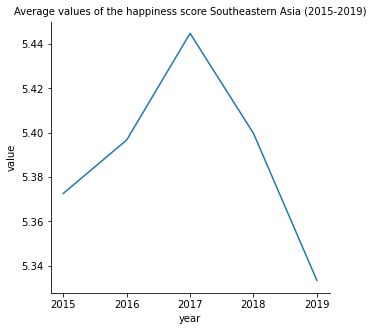

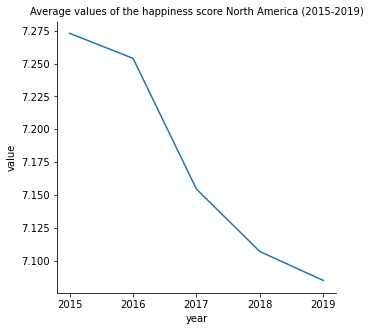

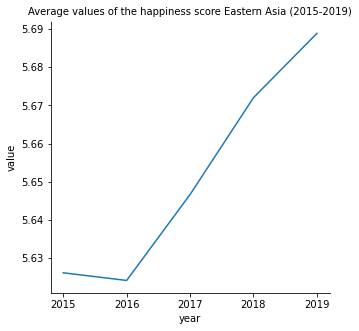

In [18]:
for reg in regions:
    happiness=[]
    frames=[df1_new[df1_new['region']==reg],df2_new[df2_new['region']==reg],
               df3_new[df3_new['region']==reg],df4_new[df4_new['region']==reg],
                df5_new[df5_new['region']==reg]]

    for frame in frames:
            happiness.append(frame['happiness score'].mean())

    df_compare=pd.DataFrame(data=np.array(happiness),columns=['happiness score'],
                            index=[2015,2016,2017,2018,2019])


    df_compare=df_compare.T.stack().reset_index().rename(columns={'level_0':'factor','level_1':'year',0:'value'})


    plt.figure(figsize=(5,5))


    sns.lineplot(data=df_compare,x='year',y='value')

    plt.title(f'Average values of the happiness score {reg} (2015-2019)',size=10)
    plt.xticks(ticks=[2015,2016,2017,2018,2019])

    ax=plt.gca()
    ax.spines[['right','top']].set_color('white')
    plt.show()

We can see that the family support became more important factor since 2016 when it has dropped across regions.From 2017 the importance of family support has increased by approx. 0.4 (or more0 accross regions (which is 40% or more of an increase).  At the same time the GDP became less importan factor. It has reached its maximum in 2017 and then it came down to approximately same level as it was in 2015. So, after 2016 and 2017 the family support becomes the most important factor in the happiness score. 

However, we still can see the decreae in the happiness index in some regions after 2017. The most drastic difference , bigger than 0.1 is in Latin America (constantly decreasing -- approx. 0.2 drop), Middel East and Northern Afica( decreasing after 2016 -apprx. 0.16 drop) and North America(constantly decreasing -approx 0.8 drop). It would be worth of looking further into details about the GDP and happiness index for these countries

The life exepctancy has surprisingly the same shape accross all regions. It had smaller drop i 2016/2017 and then it strted to increase reching the highest values in 2019.

# Developing model ( on the world level)


Since the happiness score is the sum of all the factors, it wouldn't be approrpiate to use all of them to predict the  happiness score. But I have identified the 3 most important factors. Let's see can we predict the happiness score using only GDP, Family support and Life expectancy. 

For that purpose I will need merge my data for years.

In [19]:
data=[df1_new[['country', 'region', 'happiness score', 'GDP', 'family/social_support','life_expectancy_',
                 'freedom_to_make_choices','perception_of_corruption', 'generosity', 'residual']],
               df2_new[['country', 'region', 'happiness score', 'GDP', 'family/social_support','life_expectancy_',
                          'freedom_to_make_choices','perception_of_corruption', 'generosity', 'residual']],
               df3_new[['country', 'region', 'happiness score', 'GDP', 'family/social_support','life_expectancy_',
                          'freedom_to_make_choices','perception_of_corruption', 'generosity', 'residual']],
            df4_new[['country', 'region', 'happiness score', 'GDP', 'family/social_support','life_expectancy_',
                       'freedom_to_make_choices','perception_of_corruption', 'generosity', 'residual']],
            df5_new[['country', 'region', 'happiness score', 'GDP', 'family/social_support','life_expectancy_',
                       'freedom_to_make_choices','perception_of_corruption', 'generosity', 'residual']]]
                                          
scores_year=pd.concat(data,axis=0)

scores_year

,country,region,happiness score,GDP,family/social_support,life_expectancy_,freedom_to_make_choices,perception_of_corruption,generosity,residual
0,Afghanistan,Southern Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,Albania,Central and Eastern Europe,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,Algeria,Middle East and Northern Africa,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,Argentina,Latin America and Caribbean,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
4,Armenia,Central and Eastern Europe,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
...,...,...,...,...,...,...,...,...,...,...
141,Venezuela,Latin America and Caribbean,4.707,0.96000,1.42700,0.80500,0.15400,0.06400,0.04700,1.25000
142,Vietnam,Southeastern Asia,5.175,0.74100,1.34600,0.85100,0.54300,0.14700,0.07300,1.47400
143,Yemen,Middle East and Northern Africa,3.380,0.28700,1.16300,0.46300,0.14300,0.10800,0.07700,1.13900
144,Zambia,Sub-Saharan Africa,4.107,0.57800,1.05800,0.42600,0.43100,0.24700,0.08700,1.28000


In [20]:
#defining my X and y set
X=scores_year[['GDP', 'family/social_support','life_expectancy_']]
y=scores_year['happiness score']

In [21]:
# splitting data and training linear model
from sklearn.model_selection import train_test_split
X=scores_year[['GDP', 'family/social_support','life_expectancy_']]
y=scores_year['happiness score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

from sklearn.linear_model import LinearRegression

lin_mod=LinearRegression().fit(X_train,y_train)
y_pred=lin_mod.predict(X_train)

from sklearn.metrics import mean_squared_error,r2_score

print(f'Train data RMSE={np.sqrt(mean_squared_error(y_train,y_pred))}')
print(f'Train data r_squared={r2_score(y_train, y_pred)}')

y_test_pred=lin_mod.predict(X_test)

print(f'Test data RMSE={np.sqrt(mean_squared_error(y_test,y_test_pred))}')
print(f'Test data r_squared={r2_score(y_test, y_test_pred)}')


Train data RMSE=0.586337854786734
Train data r_squared=0.7218859886111608
Test data RMSE=0.6366554986754663
Test data r_squared=0.6740138915652734


So we can see that the variations in y score can be explained by this linear model in 67% of the cases. But there is something surprising. If we look into coefficients, the highes one is for GDP, followed by life expectancy. That means that rise in life expectancy will affect the happiness score more than rise in family support. 

We can also try Lasso and Ridge regression

In [22]:
X=scores_year[['GDP', 'family/social_support','life_expectancy_']]
y=scores_year['happiness score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

model_lasso = Lasso(alpha=0.001)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(f'Train data RMSE={np.sqrt(mean_squared_error(y_train,pred_train_lasso))}')
print(f'Train data r_squared={r2_score(y_train, pred_train_lasso)}')

pred_test_lasso= model_lasso.predict(X_test)
print(f'Test data RMSE={np.sqrt(mean_squared_error(y_test,pred_test_lasso))}')
print(f'Test data r_squared={r2_score(y_test, pred_test_lasso)}')

Train data RMSE=0.5863557455485955
Train data r_squared=0.7218690163231936
Test data RMSE=0.6367865073000624
Test data r_squared=0.6738797173192765


In [23]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.001)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(f'Train data RMSE={np.sqrt(mean_squared_error(y_train,pred_train_rr))}')
print(f'Test data r_squared={r2_score(y_train, pred_train_rr)}')

pred_test_rr= rr.predict(X_test)
print(f'Test data RMSE={np.sqrt(mean_squared_error(y_test,pred_test_rr))}') 
print(f'Test data r_squared={r2_score(y_test, pred_test_rr)}')

Train data RMSE=0.5863378548644347
Test data r_squared=0.7218859885374502
Test data RMSE=0.6366559033089284
Test data r_squared=0.6740134771969695


So all 3 models give relatively similar results.

I can also see how the linear model predicts values using the individual features.

In [24]:
#using only GDP
from sklearn.model_selection import train_test_split
X=scores_year[['GDP']]
y=scores_year['happiness score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

from sklearn.linear_model import LinearRegression

lin_mod_g=LinearRegression().fit(X_train,y_train)
y_pred=lin_mod_g.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.6965583306577543


In [25]:
r_squared_g=r2_score(y_test,y_pred)

In [26]:
#using only life expectancy

from sklearn.model_selection import train_test_split
X=scores_year[['life_expectancy_']]
y=scores_year['happiness score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

from sklearn.linear_model import LinearRegression

lin_mod_l=LinearRegression().fit(X_train,y_train)
y_pred=lin_mod_l.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.7933296907672798


In [27]:
r_squared_l=r2_score(y_test,y_pred)

In [28]:
#using only familly support

from sklearn.model_selection import train_test_split
X=scores_year[['family/social_support']]
y=scores_year['happiness score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

from sklearn.linear_model import LinearRegression

lin_mod_f=LinearRegression().fit(X_train,y_train)
y_pred=lin_mod_f.predict(X_test)


print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.8828899645883418


In [29]:
r_squared_f=r2_score(y_test,y_pred)

In [30]:
print(f'model using only GDP has r^2 {r_squared_g}\nmodel using only life expectancy has r^2 {r_squared_l}\nmodel using only family support has r^2 {r_squared_f}')

model using only GDP has r^2 0.609783988089645
model using only life expectancy has r^2 0.4938286949175582
model using only family support has r^2 0.37309278865257567


From here we can indeed see that the model based on life expectancy only would give better results for predicting happiness score than the model with family support as the only feature. Still, the GDP feature seems to be the best predictor for the happiness score. 

I will try to apply the linear regreesion model on the Sub-Saharan region were the family support seemed to play an important role (looking back at the lineplots)

In [31]:
#defining my X and y set
X=scores_year[scores_year['region']=='Sub-Saharan Africa'][['GDP', 'family/social_support','life_expectancy_']]
y=scores_year[scores_year['region']=='Sub-Saharan Africa']['happiness score']

In [32]:
# splitting data and training linear model using 3 features
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)



lin_mod=LinearRegression().fit(X_train,y_train)
y_pred=lin_mod.predict(X_test)


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'metrics' is not defined

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

The r^2 for Sub-Saharan africa shows that only 37% of variations can be explained using variations in features. 
So the model is not really good. I will run the model based on those 3 features separately. 

In [ ]:
#using only GDP
X=scores_year[scores_year['region']=='Sub-Saharan Africa'][['GDP']]
y=scores_year[scores_year['region']=='Sub-Saharan Africa']['happiness score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)


lin_mod_g=LinearRegression().fit(X_train,y_train)
y_pred=lin_mod_g.predict(X_test)

r_squared_g=r2_score(y_test,y_pred)

In [ ]:
#using only family
X=scores_year[scores_year['region']=='Sub-Saharan Africa'][['family/social_support']]
y=scores_year[scores_year['region']=='Sub-Saharan Africa']['happiness score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)


lin_mod_f=LinearRegression().fit(X_train,y_train)
y_pred=lin_mod_f.predict(X_test)

r_squared_f=r2_score(y_test,y_pred)

In [ ]:
#using only family
X=scores_year[scores_year['region']=='Sub-Saharan Africa'][['life_expectancy_']]
y=scores_year[scores_year['region']=='Sub-Saharan Africa']['happiness score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)



lin_mod_l=LinearRegression().fit(X_train,y_train)
y_pred=lin_mod_l.predict(X_test)

r_squared_l=r2_score(y_test,y_pred)

In [ ]:
print(f'model using only GDP has r^2 {r_squared_g}\nmodel using only life expectancy has r^2 {r_squared_l}\nmodel using only family support has r^2 {r_squared_f}')

Based on the linear model , GDP still gives the best predictions, which is a bit contradictory to the lineplots for Sub-Saharan Africa. But, I can see that the happines score feature gives better predictions than the life expectancy. 
But all the values for r^2 are rather low so I do not think that the happiness score could be determined using the linear model and the familly suport feature solely.  

# Conclusion

In the previous investigation I was able to visulize the extent to which different features contribute the happiness index throughout the years. 

3 features werre identified as the most important. 

I was also able to see the change in the average happiness index per region.

Since the happiness score is the sum of all the features values it is misleading to use them all to model the happiness index. I decided to check how good the linear model using 3 features (alltogether and individually) can model the data. The r_squared values were somewhat good(67%)

I have discovered that for the linear model the most importan feature was GDP. 

